<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib --user -q --no-warn-script-location

  Preparing metadata (setup.py) ... done


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Wine.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.shape

(178, 14)

In [6]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
#Checking for Duplicated values
print("No. of Duplicated values :",df.duplicated().sum())

No. of Duplicated values : 0


In [8]:
# Check the percentage distribution of each class 
df['Customer_Segment'].value_counts(normalize=True)*100 

2    39.887640
1    33.146067
3    26.966292
Name: Customer_Segment, dtype: float64

In [9]:
# Defining the features
X = df.iloc[:,:-1].values # input features
Y = df.iloc[:,-1].values # output feature

In [10]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [11]:
# Fitting LDA to analyze components
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [12]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis(n_components= 2)
X_train = model.fit_transform(X_train, y_train)
X_test = model.transform(X_test)

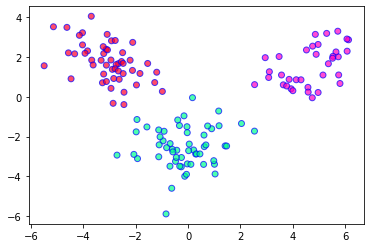

In [13]:
# plot the scatterplot
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='gist_rainbow',alpha=0.7,edgecolors='b')

In [14]:
# Fitting RandomForest classifier to the training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

#Predict the test set
y_pred = classifier.predict(X_test)

In [15]:
#Test accuracy
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_test,y_pred))

Accuracy : 0.9722222222222222


In [16]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]])

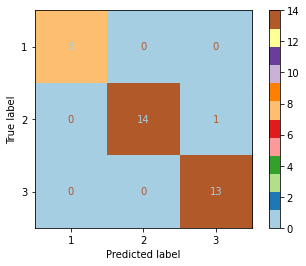

In [17]:
#Plotting Confusion matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
plot_confusion_matrix(classifier, X_test, y_test, cmap= 'Paired')
plt.show()